# Analiza regionów pod względem wieku ludności

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data_path_ludnosc = "../ludnosc.csv"
data_path_gminy = "../gminy.csv"
df_gminy = pd.read_csv(data_path_gminy, sep=";", decimal=',', low_memory=False)

In [2]:
age_regions_df = df_gminy[(df_gminy.Kategoria == "Ludność wg grup wieku") & (df_gminy.Rok > 2009) ]
age_regions_df = age_regions_df[(age_regions_df.Nazwa.str.isupper() == True)]
age_regions_df = age_regions_df.drop(['Atrybut','Unnamed: 8','Kategoria'], axis=1)
display(age_regions_df)


,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary
80738,0,POLSKA,ogółem,2010,38529866.0,osoba
80739,0,POLSKA,ogółem,2011,38538447.0,osoba
80740,0,POLSKA,ogółem,2012,38533299.0,osoba
80741,0,POLSKA,ogółem,2013,38495659.0,osoba
80742,0,POLSKA,ogółem,2014,38478602.0,osoba
...,...,...,...,...,...,...
368366,3200000,ZACHODNIOPOMORSKIE,65 i więcej,2016,276802.0,osoba
368367,3200000,ZACHODNIOPOMORSKIE,65 i więcej,2017,289263.0,osoba
368368,3200000,ZACHODNIOPOMORSKIE,65 i więcej,2018,301120.0,osoba
368369,3200000,ZACHODNIOPOMORSKIE,65 i więcej,2019,313021.0,osoba


## Rozkład grup wiekowych na przestrzeni lat

,index,Rok,Zmienna,Wartosc
0,2,2010,65 i więcej,13.471132
1,6,2011,65 i więcej,13.817409
2,10,2012,65 i więcej,14.241482
3,14,2013,65 i więcej,14.735708
4,18,2014,65 i więcej,15.265750
5,22,2015,65 i więcej,15.808674
6,26,2016,65 i więcej,16.401026
7,30,2017,65 i więcej,16.964984
8,34,2018,65 i więcej,17.527099
9,38,2019,65 i więcej,18.099408


,index,Rok,Zmienna,Wartosc
0,1,2010,15-64,71.330876
1,5,2011,15-64,71.083443
2,9,2012,15-64,70.715388
3,13,2013,15-64,70.271884
4,17,2014,15-64,69.754104
5,21,2015,15-64,69.220000
6,25,2016,15-64,68.577078
7,29,2017,15-64,67.881022
8,33,2018,15-64,67.203266
9,37,2019,15-64,66.560071


,index,Rok,Zmienna,Wartosc
0,0,2010,0-14,15.197992
1,4,2011,0-14,15.099148
2,8,2012,0-14,15.043129
3,12,2013,0-14,14.992407
4,16,2014,0-14,14.980147
5,20,2015,0-14,14.971325
6,24,2016,0-14,15.021896
7,28,2017,0-14,15.153994
8,32,2018,0-14,15.269635
9,36,2019,0-14,15.340521


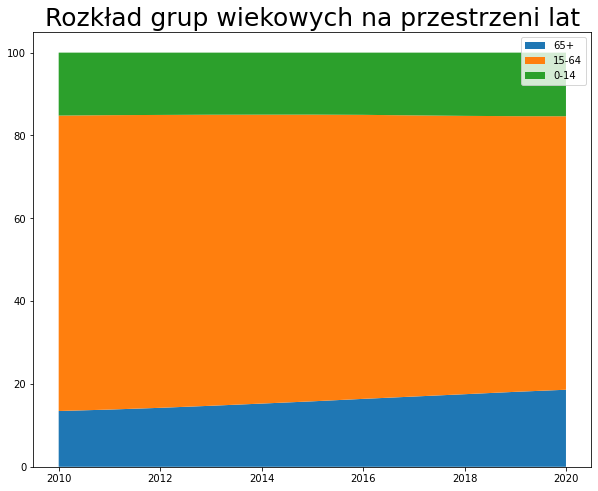

In [29]:
age_year = age_regions_df.groupby(['Rok','Zmienna']).sum().drop('Kod', axis=1)
age_year = age_year.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))*2 ## nie wiem czemu tutaj bez x2 sumuje do 50%
age_year = age_year.reset_index()
oldest_chart = pd.DataFrame()
oldest_chart = age_year[(age_year.Zmienna == "65 i więcej")].reset_index()
display(oldest_chart)
middleage_chart = pd.DataFrame()
middleage_chart = age_year[(age_year.Zmienna == "15-64")].reset_index()
display(middleage_chart)
youngest_chart = pd.DataFrame()
youngest_chart = age_year[(age_year.Zmienna == "0-14")].reset_index()
display(youngest_chart)


plt.figure(figsize=(10,8))
plt.title('Rozkład grup wiekowych na przestrzeni lat', size=25)
plt.stackplot(oldest_chart.Rok, oldest_chart['Wartosc'], middleage_chart['Wartosc'], youngest_chart['Wartosc'], labels=['65+','15-64','0-14'])
plt.legend()

## Najmłodszy i najstarszy region w Polsce w 2020 roku

In [26]:
age_region = age_regions_df[(age_regions_df.Rok == 2020)]
age_region = age_region.groupby(['Nazwa','Zmienna','Rok']).sum().drop('Kod', axis=1)
age_region = (age_region.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))*2).reset_index()
oldest_region = pd.DataFrame()
oldest_region = age_region[(age_region.Zmienna == "65 i więcej")].sort_values('Wartosc', ascending=False)
display(oldest_region.head(3))
youngest_region = pd.DataFrame()
youngest_region = age_region[(age_region.Zmienna == "0-14")].sort_values('Wartosc', ascending=False)
display(youngest_region.head(3))

print('Najstarszym regionem w Polsce w 2020 roku był', oldest_region.Nazwa.head(1).values, 'W którym: ',oldest_region.Wartosc.head(1).values,"% to ludzie w wieku 65+")
print('Najmłodszym regionem w Polsce w 2020 roku był', youngest_region.Nazwa.head(1).values, 'W którym: ',youngest_region.Wartosc.head(1).values,"% to ludzie w wieku poniżej 15 lat")

,Nazwa,Zmienna,Rok,Wartosc
58,ŁÓDZKIE,65 i więcej,2020,20.671952
66,ŚWIĘTOKRZYSKIE,65 i więcej,2020,20.263983
62,ŚLĄSKIE,65 i więcej,2020,19.761749


,Nazwa,Zmienna,Rok,Wartosc
40,POMORSKIE,0-14,2020,16.855324
48,WIELKOPOLSKIE,0-14,2020,16.567919
16,MAZOWIECKIE,0-14,2020,16.524634


Najstarszym regionem w Polsce w 2020 roku był ['ŁÓDZKIE'] W którym:  [20.67195249] % to ludzie w wieku 65+
Najmłodszym regionem w Polsce w 2020 roku był ['POMORSKIE'] W którym:  [16.85532399] % to ludzie w wieku poniżej 15 lat
